<h1 style="color:Blue;">Плотность костной ткани</h1>

In [1]:
import cv2
import matplotlib

In [82]:
#import pylab # модуль для построения графиков
#from PIL import ImageEnhance
#import ipywidgets as widgets
#import matplotlib.image as mpimg
import warnings
#import tifffile
#import tkinter
#import os
#from skimage import io, color
#from skimage import util
#import pydicom
#from skimage.transform import rotate

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
import statistics
import scipy.special as sps
from scipy.stats import kurtosis
from scipy.stats import skew
from collections import Counter

In [5]:
from PIL import Image # отрисовка изображений
from IPython.display import display

In [83]:
%matplotlib inline
# Отключение всех предупреждений о будущих изменениях
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

<h2 style="color:Blue;">Healthy горизонтальное сечение из множества изображений healthy</h2>

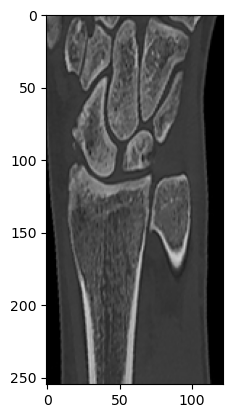

In [7]:
# Уже четырёхканальное
%matplotlib inline
image1 = Image.open('standard/28(24)_cropped.png')
plt.imshow(image1, cmap='gray')
#plt.axis('off')
plt.show()

In [8]:
image1.size

(122, 255)

<h4 style="color:Blue;">Преобразование одноканального изображения в четырёхканальное</h4>

<h4 style="color:Blue;">Лучевая</h4>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
from PIL import Image, ImageDraw
import pandas as pd
import matplotlib

matplotlib.use('TkAgg')  # Используйте TkAgg backend
from matplotlib.backend_bases import MouseButton

df228 = pd.DataFrame(columns=['pixels_inside_curve'])

image_path = 'standard/28(24)_cropped.png'  # Путь к изображению
image = Image.open(image_path).convert("RGBA")

# изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro', markersize=3)
        fig.canvas.draw()
        
        # Когда было выбрано 31 точек или больше, нарисовать кривую линию
        if len(points) == 31:
            if points[0] != points[-1]:
                points.append(points[0])
            line_image = draw_spline(points)  # Теперь передаем line_image
            save_combined_image(line_image)
            save_internal_pixels_list(points)  # Сначала сохраним изображение, затем пиксели
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=1.5)  # Рисование линии
    fig.canvas.draw()
    
     # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    return line_image

# Функция для сохранения изображения с нанесённой линией
def save_combined_image(line_image):
    # Копируем исходное изображение
    combined_image = image.copy()
    combined_image = Image.alpha_composite(combined_image, line_image)
    combined_image.save("standard/28(24)_and_line28.png")
    print("Изображение сохранено как standard/28(24)_and_line28.png")

# Функция для сохранения списка пикселей внутри замкнутой кривой линии
def save_internal_pixels_list(points):
    mask = Image.new("L", image.size, 0)
    points = [(int(p[0]), int(p[1])) for p in points]
    ImageDraw.Draw(mask).polygon(points, outline=1, fill=1)
    mask = np.array(mask)
    
    internal_pixels = image_array[mask == 1]
    
    # Добавление списка пикселей в DataFrame
    df228.loc[len(df228)] = [internal_pixels.tolist()]
    print("Пиксели внутри замкнутой кривой линии добавлены в DataFrame")
    print(df228)

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение сохранено как standard/28(24)_and_line28.png
Пиксели внутри замкнутой кривой линии добавлены в DataFrame
                                 pixels_inside_curve
0  [[93, 93, 93, 255], [100, 100, 100, 255], [95,...


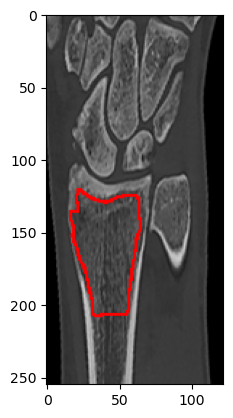

In [2]:
%matplotlib inline
image1 = Image.open('standard/28(24)_and_line28.png')
plt.imshow(image1, cmap='gray')
#plt.axis('off')
plt.show()

In [3]:
df228

,pixels_inside_curve
0,"[[93, 93, 93, 255], [100, 100, 100, 255], [95,..."


In [4]:
len(df228.iloc[0,0])

3008

In [5]:
c228 = df228.iloc[0,0]

In [6]:
c228[0]

[93, 93, 93, 255]

In [9]:
listic228 = [sublist[0] for sublist in c228]  # Список первых элементов

print(listic228[0:10]) 

[93, 100, 95, 96, 97, 89, 87, 87, 90, 88]


In [11]:
listic228[0:10]

[93, 100, 95, 96, 97, 89, 87, 87, 90, 88]

#### Сохранение списка в директорию

In [12]:
# Сохранение в формате pickle
import pickle
with open('listic228.pkl', 'wb') as f:
    pickle.dump(listic228, f)

In [13]:
import pickle
# Загрузка из pickle-файла
with open('listic70.pkl', 'rb') as f:
    listic70 = pickle.load(f)

<h3 style="color:Blue;">Представление изображения 28(24) healthy</h3>

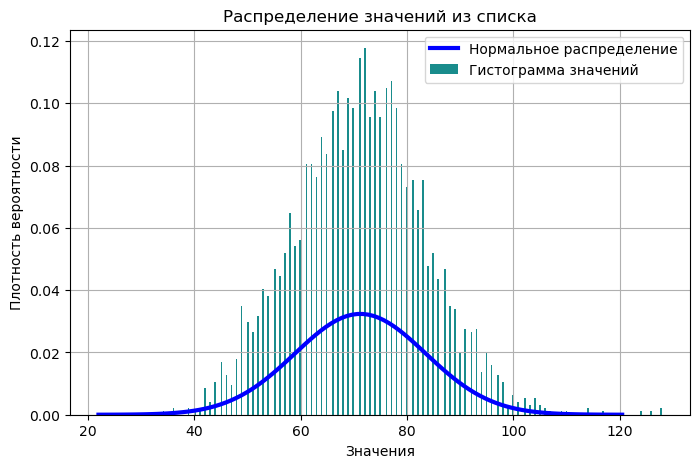

Эксцесс  0.31890846033342246
Асимметрия  0.182151028954643
Среднее значение пикселей: 71.21476063829788
Минимальное значение пикселей: 34
Минимальное значение пикселей: 128
Три наиболее часто встречающихся значения:
Значение: 72, Частота: 111
Значение: 71, Частота: 108
Значение: 77, Частота: 101


In [144]:
from collections import Counter
from scipy.stats import kurtosis
from scipy.stats import skew
import statistics
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
# Вычисление среднего и стандартного отклонения
mean = np.mean(listic228) ######################################################################
std_dev = np.std(listic228) ###############################################################################

# Генерация точек для построения нормального распределения
x = np.linspace(mean -4*std_dev, mean + 4*std_dev, 100)
y = stats.norm.pdf(x, mean, std_dev)


# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(x, y, linewidth=3, color='b', label='Нормальное распределение')
plt.hist(listic228, density=True, bins=300, alpha=0.9, color='Teal', label='Гистограмма значений') ############################


plt.title('Распределение значений из списка')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()
print("Эксцесс ", kurtosis(listic228))######################################################
print("Асимметрия ", skew(listic228))####################################################

average = statistics.mean(listic228) #####################################################
print(f'Среднее значение пикселей: {average}') 

mi = min(listic228)##################################################################
print(f'Минимальное значение пикселей: {mi}') 
ma = max(listic228)###################################################################
print(f'Минимальное значение пикселей: {ma}') 

count = Counter(listic228)  ##################################################################
# Получение трех наиболее распространенных значений и их частоты
most_common_three = count.most_common(3)
print("Три наиболее часто встречающихся значения:")
for value, freq in most_common_three:
    print(f'Значение: {value}, Частота: {freq}')


<h4 style="color:Blue;">Отношение объема пересечения к объему объединения гистограммы и её нормального распределения (healthy)</h4>

Отношение объема пересечения к объему объединения: 0.9247310042080323


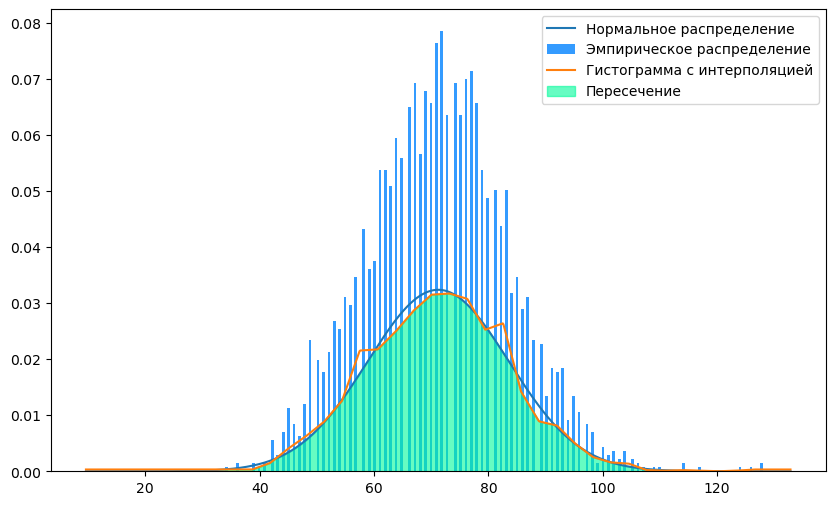

In [208]:
%matplotlib inline
# Вычисление среднего и стандартного отклонения
mean = np.mean(listic228)
std_dev = np.std(listic228)

# Генерация точек для нормального распределения
x = np.linspace(mean - 5*std_dev, mean + 5*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)

# Построение гистограммы для списка listic
hist, bin_edges = np.histogram(listic228, bins=30, density=True)

# Пересчет гистограммы в значения плотности
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Интерполяция значений для гистограммы для лучшего сравнения
hist_interp = np.interp(x, bin_centers, hist)

# Рассчитываем минимальные значения для пересечения распределений
intersection = np.minimum(y, hist_interp)

# Объемы
volume_intersection = np.trapz(intersection, x)
volume_union = np.trapz(y, x) + np.trapz(hist_interp, x) - volume_intersection

# Отношение объема пересечения к объему объединения
ratio = volume_intersection / volume_union

print(f'Отношение объема пересечения к объему объединения: {ratio}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Нормальное распределение')
plt.hist(listic228, bins=200, color='DodgerBlue', density=True, alpha=0.9, label='Эмпирическое распределение')
plt.plot(x, hist_interp, label='Гистограмма с интерполяцией')
plt.fill_between(x, intersection, color='MediumSpringGreen', alpha=0.6, label='Пересечение')
plt.legend()
plt.show()

<h4 style="color:Blue;">Пересечение гистограммы "сама с собой"</h4>

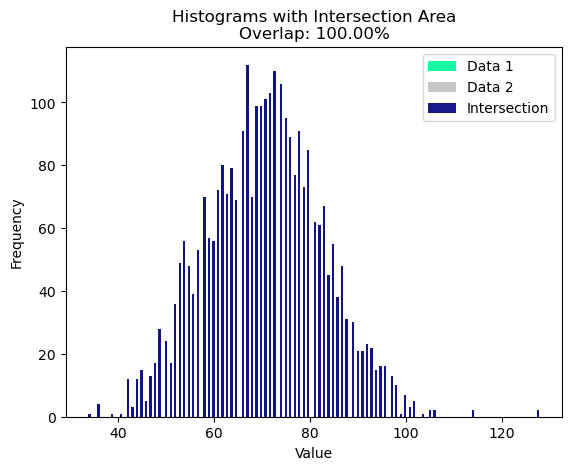

In [202]:
import numpy as np
import matplotlib.pyplot as plt

def resample_list(data, target_size, seed):
    """Функция для ресемплирования одного списка до размера другого."""
    np.random.seed(seed)  # Установим seed для воспроизводимости
    return np.random.choice(data, target_size, replace=True)

def compute_histogram(data, bins, range):
    """Функция для построения гистограммы."""
    hist, bin_edges = np.histogram(data, bins=bins, range=range)
    return hist, bin_edges

def calculate_overlap_and_union(norm_hist, pat_hist):
    """Функция для вычисления объема пересечения и объема объединения."""
    overlap = np.minimum(norm_hist, pat_hist).sum()
    union = np.maximum(norm_hist, pat_hist).sum()
    return overlap, union

data1 = listic228
data2 = listic228

# Установим значение seed для воспроизводимости
seed = 42

# Ресемплирование списков до одинакового размера
target_size = max(len(data1), len(data2))
data1_resampled = resample_list(data1, target_size, seed)
data2_resampled = resample_list(data2, target_size, seed)

# Определение количества контейнеров (bins) для гистограммы
num_bins = 200

# Определение диапазона данных для гистограммы
data_range = (min(min(data1_resampled), min(data2_resampled)), max(max(data1_resampled), max(data2_resampled)))

# Построение гистограмм
hist1, bin_edges1 = compute_histogram(data1_resampled, bins=num_bins, range=data_range)
hist2, bin_edges2 = compute_histogram(data2_resampled, bins=num_bins, range=data_range)

# Находим минимальные значения гистограмм для зоны пересечения
intersection = np.minimum(hist1, hist2)

# Определяем ширину контейнера (бина)
bin_width = (bin_edges1[1] - bin_edges1[0])

# Вычисление пересечения и объединения гистограмм
overlap, union = calculate_overlap_and_union(hist1, hist2)

# Вычисление показателя степени пересечения в процентах
overlap_percentage = (overlap / union) * 100

# Построение графика
fig, ax = plt.subplots()

# Гистограмма для данных 1
ax.bar(bin_edges1[:-1], hist1, width=bin_width, color='MediumSpringGreen', alpha=0.9, label='Data 1')

# Гистограмма для данных 2
ax.bar(bin_edges2[:-1], hist2, width=bin_width, color='Silver', alpha=0.9, label='Data 2')

# Пересечение гистограмм
ax.bar(bin_edges1[:-1], intersection, width=bin_width, color='Navy', alpha=0.9, label='Intersection')

# Легенда и подписи
ax.legend()
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title(f'Histograms with Intersection Area\nOverlap: {overlap_percentage:.2f}%')

plt.show()

<h1 style="color:Maroon;">Патология 70(2)</h1>

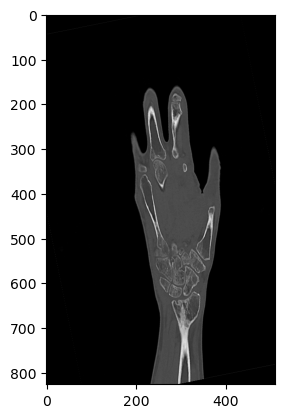

In [17]:
%matplotlib inline
image70 = Image.open('70(2).png')
plt.imshow(image70, cmap='gray')
#plt.axis('off')
plt.show()

In [18]:
image = Image.open('70(2).png')

# размеры для обрезки
left = 200
top = 550
right = 100
bottom = 100

cropped_image = image.crop((left, top, image.width - right, image.height - bottom))

cropped_image.save('70(2)_cropped.png')

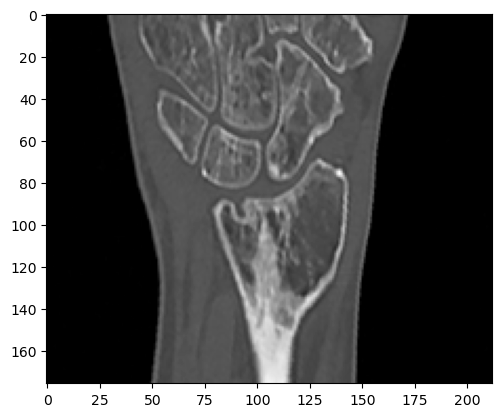

In [19]:
%matplotlib inline
image70 = Image.open('70(2)_cropped.png')
plt.imshow(image70, cmap='gray')
#plt.axis('off')
plt.show()

<h4 style="color:Maroon;">Преобразование одноканального изображения в четырёхканальное</h4>

In [160]:
# Путь к входному и выходному изображениям
input_image_path = '70(2)_cropped.png'
output_image_path = '70(2_4).png'

# Открытие одноканального изображения
single_channel_image = Image.open(input_image_path).convert("L")  # Переход в режим "L" (одноканальное изображение)
single_channel_data = np.array(single_channel_image)

# Создание пустого массива для четырехканального изображения
height, width = single_channel_data.shape
four_channel_data = np.zeros((height, width, 4), dtype=np.uint8)

# Заполнение RGB каналов одноканальным изображением и альфа-канала значением 255 (полная непрозрачность)
four_channel_data[..., 0] = single_channel_data  # Красный канал
four_channel_data[..., 1] = single_channel_data  # Зеленый канал
four_channel_data[..., 2] = single_channel_data  # Синий канал
four_channel_data[..., 3] = 255  # Альфа-канал

# Создание четырехканального изображения из массива данных
four_channel_image = Image.fromarray(four_channel_data, 'RGBA')

# Сохранение четырехканального изображения
four_channel_image.save(output_image_path)

print(f"Четырехканальное изображение сохранено как {output_image_path}")

Четырехканальное изображение сохранено как 70(2_4).png


<h4 style="color:Maroon;">Лучевая</h4>

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
from PIL import Image, ImageDraw
import pandas as pd
import matplotlib

matplotlib.use('TkAgg')  # Используйте TkAgg backend
from matplotlib.backend_bases import MouseButton

df70 = pd.DataFrame(columns=['pixels_inside_curve'])

image_path = '70(2_4).png'  # Путь к изображению
image = Image.open(image_path).convert("RGBA")

# Конвертируем изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# Создаем список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro', markersize=1)
        fig.canvas.draw()
        
        # Когда было выбрано 31 точек или больше, нарисовать кривую линию
        if len(points) == 31:
            if points[0] != points[-1]:
                points.append(points[0])
            line_image = draw_spline(points)  # Теперь передаем line_image
            save_combined_image(line_image)
            save_internal_pixels_list(points)  # Сначала сохраним изображение, затем пиксели
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=0.3)  # Рисование линии
    fig.canvas.draw()
    
     # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    return line_image

# Функция для сохранения изображения с нанесённой линией
def save_combined_image(line_image):
    # Копируем исходное изображение
    combined_image = image.copy()
    combined_image = Image.alpha_composite(combined_image, line_image)
    combined_image.save("70(2-4)_and_line.png")
    print("Изображение сохранено как 70(2-4)_and_line.png")

# Функция для сохранения списка пикселей внутри замкнутой кривой линии
def save_internal_pixels_list(points):
    mask = Image.new("L", image.size, 0)
    points = [(int(p[0]), int(p[1])) for p in points]
    ImageDraw.Draw(mask).polygon(points, outline=1, fill=1)
    mask = np.array(mask)
    
    internal_pixels = image_array[mask == 1]
    
    # Добавление списка пикселей в DataFrame
    df70.loc[len(df70)] = [internal_pixels.tolist()]
    print("Пиксели внутри замкнутой кривой линии добавлены в DataFrame")
    print(df70)

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение сохранено как 70(2-4)_and_line.png
Пиксели внутри замкнутой кривой линии добавлены в DataFrame
                                 pixels_inside_curve
0  [[71, 71, 71, 255], [89, 89, 89, 255], [80, 80...


In [162]:
df70

,pixels_inside_curve
0,"[[71, 71, 71, 255], [89, 89, 89, 255], [80, 80..."


In [163]:
len(df70.iloc[0,0])

2200

In [165]:
c70 = df70.iloc[0,0]

In [167]:
c70[0]

[71, 71, 71, 255]

In [168]:
listic70 = [sublist[0] for sublist in c70]  # Список первых элементов
print(listic70[0:5]) 

[71, 89, 80, 77, 98]


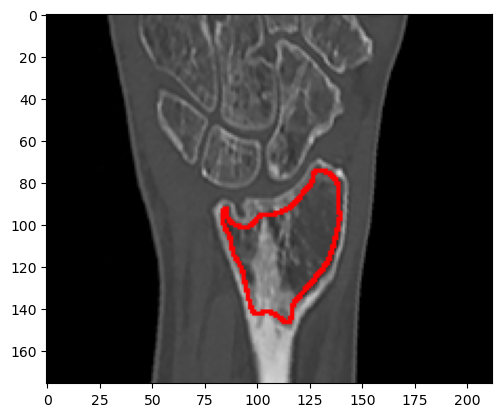

In [25]:
%matplotlib inline
image70 = Image.open('70(2-4)_and_line.png')
plt.imshow(image70, cmap='gray')
#plt.axis('off')
plt.show()

<h4 style="color:Maroon;">Сохранение списка в директорию</h4>

In [177]:
# Сохранение в формате pickle
import pickle
with open('listic70.pkl', 'wb') as f:
    pickle.dump(listic70, f)

In [20]:
# Загрузка из pickle-файла
with open('listic70.pkl', 'rb') as f:
    listic70 = pickle.load(f)

<h4 style="color:Maroon;">Характеристика пикселей вырезенного участка лучевой кости с патологией</h4>

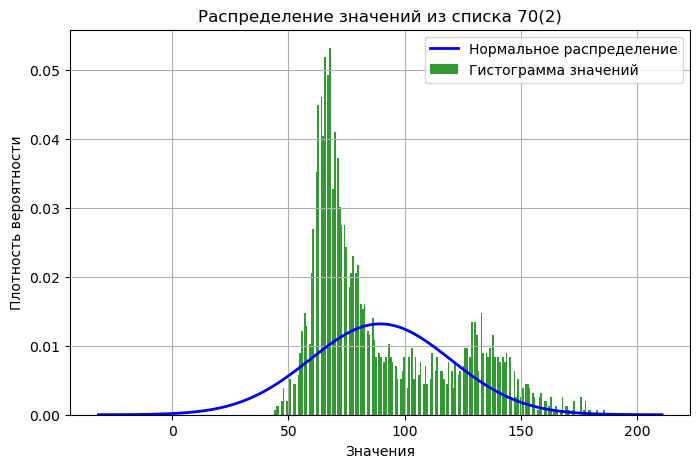

Эксцесс  -0.31553687344826287
Асимметрия  0.9201362631820078
Среднее значение пикселей: 89.50590909090909
Три наиболее часто встречающихся значения:
Значение: 68, Частота: 83
Значение: 66, Частота: 81
Значение: 67, Частота: 77


In [204]:
%matplotlib inline
# Вычисление среднего и стандартного отклонения
mean = np.mean(listic70)
std_dev = np.std(listic70)

# Генерация точек для построения нормального распределения
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 500)
y = stats.norm.pdf(x, mean, std_dev)


# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(x, y, linewidth=2, color='blue', label='Нормальное распределение')
plt.hist(listic70, density=True, bins=200, alpha=0.8, color='g', label='Гистограмма значений')
plt.title('Распределение значений из списка 70(2)')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()
print("Эксцесс ", kurtosis(listic70))
print("Асимметрия ", skew(listic70))

average = statistics.mean(listic70)
print(f'Среднее значение пикселей: {average}') 

count = Counter(listic70)
# Получение трех наиболее распространенных значений и их частоты
most_common_three = count.most_common(3)
print("Три наиболее часто встречающихся значения:")
for value, freq in most_common_three:
    print(f'Значение: {value}, Частота: {freq}')


<h4 style="color:Maroon;">Отношение объема пересечения к объему объединения гистограммы и её нормального распределения</h4>

Отношение объема пересечения к объему объединения: 0.49080945719480384


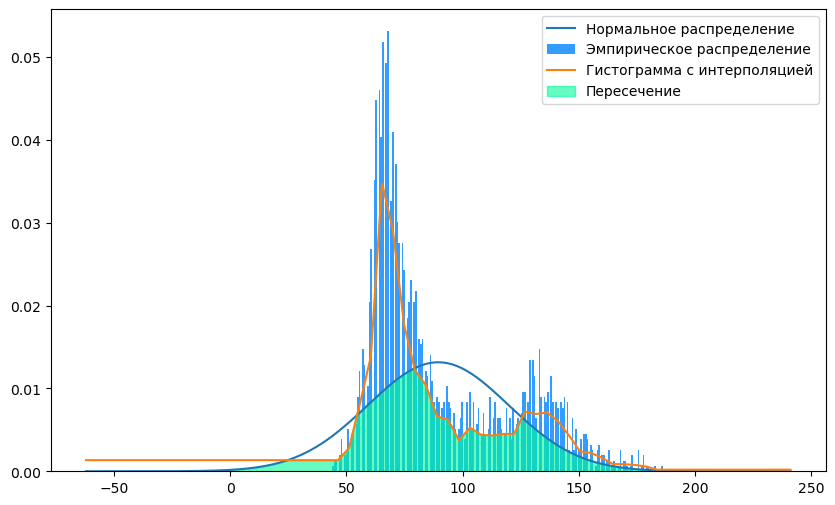

In [209]:
%matplotlib inline
# Вычисление среднего и стандартного отклонения
mean = np.mean(listic70)
std_dev = np.std(listic70)

# Генерация точек для нормального распределения
x = np.linspace(mean - 5*std_dev, mean + 5*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)

# Построение гистограммы для списка listic
hist, bin_edges = np.histogram(listic70, bins=30, density=True)

# Пересчет гистограммы в значения плотности
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Интерполяция значений для гистограммы для лучшего сравнения
hist_interp = np.interp(x, bin_centers, hist)

# Рассчитываем минимальные значения для пересечения распределений
intersection = np.minimum(y, hist_interp)

# Объемы
volume_intersection = np.trapz(intersection, x)
volume_union = np.trapz(y, x) + np.trapz(hist_interp, x) - volume_intersection

# Отношение объема пересечения к объему объединения
ratio = volume_intersection / volume_union

print(f'Отношение объема пересечения к объему объединения: {ratio}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Нормальное распределение')
plt.hist(listic70, bins=200, color='DodgerBlue', density=True, alpha=0.9, label='Эмпирическое распределение')
plt.plot(x, hist_interp, label='Гистограмма с интерполяцией')
plt.fill_between(x, intersection, color='MediumSpringGreen', alpha=0.6, label='Пересечение')
plt.legend()
plt.show()

<h4 style="color:Maroon;">Пересечение гистограммы listic70 с эталонной healthy</h4>

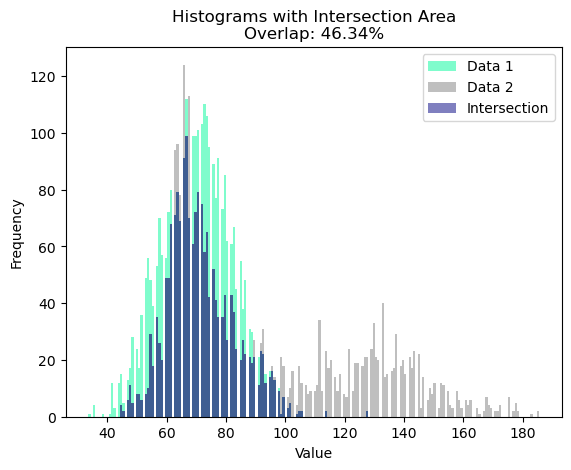

In [153]:
import numpy as np
import matplotlib.pyplot as plt

def resample_list(data, target_size, seed):
    """Функция для ресемплирования одного списка до размера другого."""
    np.random.seed(seed)  # Установим seed для воспроизводимости
    return np.random.choice(data, target_size, replace=True)

def compute_histogram(data, bins, range):
    """Функция для построения гистограммы."""
    hist, bin_edges = np.histogram(data, bins=bins, range=range)
    return hist, bin_edges

def calculate_overlap_and_union(norm_hist, pat_hist):
    """Функция для вычисления объема пересечения и объема объединения."""
    overlap = np.minimum(norm_hist, pat_hist).sum()
    union = np.maximum(norm_hist, pat_hist).sum()
    return overlap, union

data1 = listic228
data2 = listic70

# Установим значение seed для воспроизводимости
seed = 42

# Ресемплирование списков до одинакового размера
target_size = max(len(data1), len(data2))
data1_resampled = resample_list(data1, target_size, seed)
data2_resampled = resample_list(data2, target_size, seed)

# Определение количества контейнеров (bins) для гистограммы
num_bins = 200

# Определение диапазона данных для гистограммы
data_range = (min(min(data1_resampled), min(data2_resampled)), max(max(data1_resampled), max(data2_resampled)))

# Построение гистограмм
hist1, bin_edges1 = compute_histogram(data1_resampled, bins=num_bins, range=data_range)
hist2, bin_edges2 = compute_histogram(data2_resampled, bins=num_bins, range=data_range)

# Находим минимальные значения гистограмм для зоны пересечения
intersection = np.minimum(hist1, hist2)

# Определяем ширину контейнера (бина)
bin_width = (bin_edges1[1] - bin_edges1[0])

# Вычисление пересечения и объединения гистограмм
overlap, union = calculate_overlap_and_union(hist1, hist2)

# Вычисление показателя степени пересечения в процентах
overlap_percentage = (overlap / union) * 100

# Построение графика
fig, ax = plt.subplots()

# Гистограмма для данных 1
ax.bar(bin_edges1[:-1], hist1, width=bin_width, color='MediumSpringGreen', alpha=0.5, label='Data 1')

# Гистограмма для данных 2
ax.bar(bin_edges2[:-1], hist2, width=bin_width, color='Gray', alpha=0.5, label='Data 2')

# Пересечение гистограмм
ax.bar(bin_edges1[:-1], intersection, width=bin_width, color='Navy', alpha=0.5, label='Intersection')

# Легенда и подписи
ax.legend()
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title(f'Histograms with Intersection Area\nOverlap: {overlap_percentage:.2f}%')

plt.show()

<h1 style="color:Maroon;">Патология 68(2)</h1>

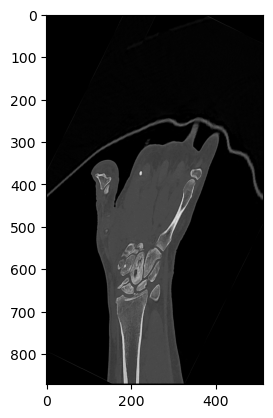

In [26]:
%matplotlib inline
image70 = Image.open('68(2).png')
plt.imshow(image70, cmap='gray')
#plt.axis('off')
plt.show()

In [27]:
image = Image.open('68(2).png')

# размеры для обрезки
left = 125
top = 550
right = 175
bottom = 10

cropped_image = image.crop((left, top, image.width - right, image.height - bottom))

cropped_image.save('68(2)_cropped.png')

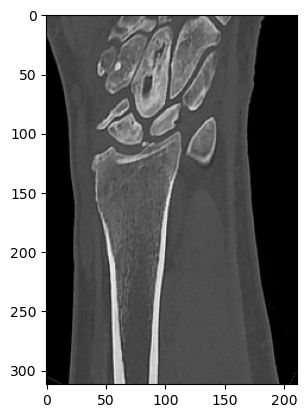

In [28]:
%matplotlib inline
image70 = Image.open('68(2)_cropped.png')
plt.imshow(image70, cmap='gray')
#plt.axis('off')
plt.show()

#### Преобразование одноканального изображения в четырёхканальное

In [29]:
# Путь к входному и выходному изображениям
input_image_path = '68(2)_cropped.png'
output_image_path = '68(2_4).png'

# Открытие одноканального изображения
single_channel_image = Image.open(input_image_path).convert("L")  # Переход в режим "L" (одноканальное изображение)
single_channel_data = np.array(single_channel_image)

# Создание пустого массива для четырехканального изображения
height, width = single_channel_data.shape
four_channel_data = np.zeros((height, width, 4), dtype=np.uint8)

# Заполнение RGB каналов одноканальным изображением и альфа-канала значением 255 (полная непрозрачность)
four_channel_data[..., 0] = single_channel_data  # Красный канал
four_channel_data[..., 1] = single_channel_data  # Зеленый канал
four_channel_data[..., 2] = single_channel_data  # Синий канал
four_channel_data[..., 3] = 255  # Альфа-канал

# Создание четырехканального изображения из массива данных
four_channel_image = Image.fromarray(four_channel_data, 'RGBA')

# Сохранение четырехканального изображения
four_channel_image.save(output_image_path)

print(f"Четырехканальное изображение сохранено как {output_image_path}")

Четырехканальное изображение сохранено как 68(2_4).png


#### Лучевая

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
from PIL import Image, ImageDraw
import pandas as pd
import matplotlib

matplotlib.use('TkAgg')  # Используйте TkAgg backend
from matplotlib.backend_bases import MouseButton

df68 = pd.DataFrame(columns=['pixels_inside_curve'])

image_path = '68(2_4).png'  # Путь к изображению
image = Image.open(image_path).convert("RGBA")

# Конвертируем изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# Создаем список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro', markersize=1)
        fig.canvas.draw()
        
        # Когда было выбрано 31 точек или больше, нарисовать кривую линию
        if len(points) == 31:
            if points[0] != points[-1]:
                points.append(points[0])
            line_image = draw_spline(points)  # Теперь передаем line_image
            save_combined_image(line_image)
            save_internal_pixels_list(points)  # Сначала сохраним изображение, затем пиксели
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=0.3)  # Рисование линии
    fig.canvas.draw()
    
     # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    return line_image

# Функция для сохранения изображения с нанесённой линией
def save_combined_image(line_image):
    # Копируем исходное изображение
    combined_image = image.copy()
    combined_image = Image.alpha_composite(combined_image, line_image)
    combined_image.save("68(2-4)_and_line.png")
    print("Изображение сохранено как 68(2-4)_and_line.png")

# Функция для сохранения списка пикселей внутри замкнутой кривой линии
def save_internal_pixels_list(points):
    mask = Image.new("L", image.size, 0)
    points = [(int(p[0]), int(p[1])) for p in points]
    ImageDraw.Draw(mask).polygon(points, outline=1, fill=1)
    mask = np.array(mask)
    
    internal_pixels = image_array[mask == 1]
    
    # Добавление списка пикселей в DataFrame
    df68.loc[len(df68)] = [internal_pixels.tolist()]
    print("Пиксели внутри замкнутой кривой линии добавлены в DataFrame")
    print(df68)

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение сохранено как 68(2-4)_and_line.png
Пиксели внутри замкнутой кривой линии добавлены в DataFrame
                                 pixels_inside_curve
0  [[89, 89, 89, 255], [99, 99, 99, 255], [91, 91...


In [31]:
df68

,pixels_inside_curve
0,"[[89, 89, 89, 255], [99, 99, 99, 255], [91, 91..."


In [32]:
len(df68.iloc[0,0])

4907

In [33]:
c68 = df68.iloc[0,0]

In [34]:
c68[0]

[89, 89, 89, 255]

In [35]:
listic68 = [sublist[0] for sublist in c68]  # Список первых элементов
print(listic70[0:5]) 

[71, 89, 80, 77, 98]


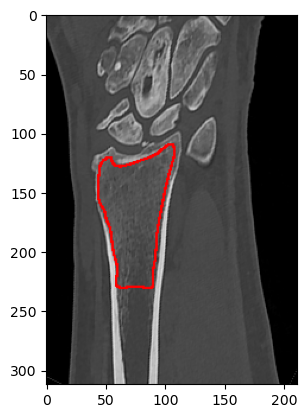

In [36]:
%matplotlib inline
image70 = Image.open('68(2-4)_and_line.png')
plt.imshow(image70, cmap='gray')
#plt.axis('off')
plt.show()

In [37]:
# Сохранение в формате pickle
import pickle
with open('listic68.pkl', 'wb') as f:
    pickle.dump(listic68, f)

In [38]:
# Загрузка из pickle-файла
with open('listic68.pkl', 'rb') as f:
    listic68 = pickle.load(f)

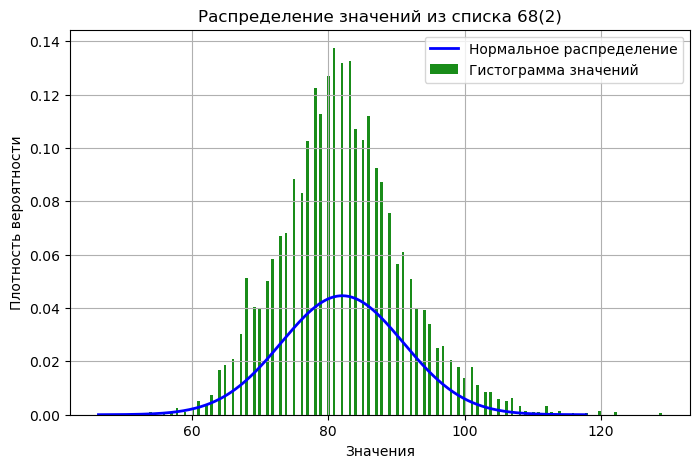

Эксцесс  0.7111539814473429
Асимметрия  0.38819006082145574
Минимальное значение пикселей: 51
Минимальное значение пикселей: 129
Среднее значение пикселей: 82.06032198899531
Три наиболее часто встречающихся значения:
Значение: 81, Частота: 263
Значение: 83, Частота: 254
Значение: 82, Частота: 252


In [210]:
%matplotlib inline
# Вычисление среднего и стандартного отклонения
mean = np.mean(listic68)
std_dev = np.std(listic68)

# Генерация точек для построения нормального распределения
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 500)
y = stats.norm.pdf(x, mean, std_dev)


# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(x, y, linewidth=2, color='blue', label='Нормальное распределение')
plt.hist(listic68, density=True, bins=200, alpha=0.9, color='g', label='Гистограмма значений')
plt.title('Распределение значений из списка 68(2)')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()
print("Эксцесс ", kurtosis(listic68))
print("Асимметрия ", skew(listic68))

mi = min(listic68)##################################################################
print(f'Минимальное значение пикселей: {mi}') 
ma = max(listic68)###################################################################
print(f'Минимальное значение пикселей: {ma}') 


average = statistics.mean(listic68)
print(f'Среднее значение пикселей: {average}') 

count = Counter(listic68)
# Получение трех наиболее распространенных значений и их частоты
most_common_three = count.most_common(3)
print("Три наиболее часто встречающихся значения:")
for value, freq in most_common_three:
    print(f'Значение: {value}, Частота: {freq}')


Отношение объема пересечения к объему объединения: 0.8473193960457447


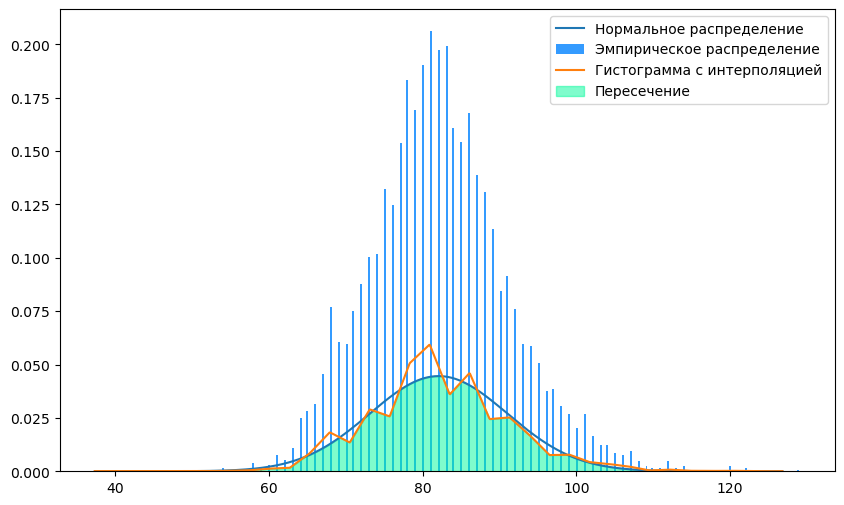

In [211]:
%matplotlib inline
# Вычисление среднего и стандартного отклонения
mean = np.mean(listic68)
std_dev = np.std(listic68)

# Генерация точек для нормального распределения
x = np.linspace(mean - 5*std_dev, mean + 5*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)

# Построение гистограммы для списка listic
hist, bin_edges = np.histogram(listic68, bins=30, density=True)

# Пересчет гистограммы в значения плотности
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Интерполяция значений для гистограммы для лучшего сравнения
hist_interp = np.interp(x, bin_centers, hist)

# Рассчитываем минимальные значения для пересечения распределений
intersection = np.minimum(y, hist_interp)

# Объемы
volume_intersection = np.trapz(intersection, x)
volume_union = np.trapz(y, x) + np.trapz(hist_interp, x) - volume_intersection

# Отношение объема пересечения к объему объединения
ratio = volume_intersection / volume_union

print(f'Отношение объема пересечения к объему объединения: {ratio}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Нормальное распределение')
plt.hist(listic68, bins=300, color='DodgerBlue', density=True, alpha=0.9, label='Эмпирическое распределение')
plt.plot(x, hist_interp, label='Гистограмма с интерполяцией')
plt.fill_between(x, intersection, color='MediumSpringGreen', alpha=0.5, label='Пересечение')
plt.legend()
plt.show()

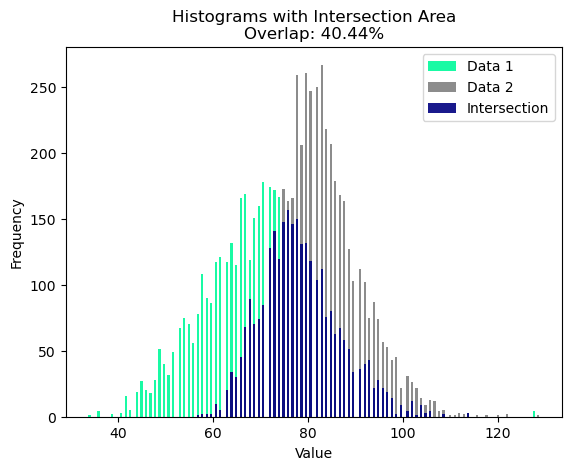

In [212]:
import numpy as np
import matplotlib.pyplot as plt

def resample_list(data, target_size, seed):
    """Функция для ресемплирования одного списка до размера другого."""
    np.random.seed(seed)  # Установим seed для воспроизводимости
    return np.random.choice(data, target_size, replace=True)

def compute_histogram(data, bins, range):
    """Функция для построения гистограммы."""
    hist, bin_edges = np.histogram(data, bins=bins, range=range)
    return hist, bin_edges

def calculate_overlap_and_union(norm_hist, pat_hist):
    """Функция для вычисления объема пересечения и объема объединения."""
    overlap = np.minimum(norm_hist, pat_hist).sum()
    union = np.maximum(norm_hist, pat_hist).sum()
    return overlap, union

data1 = listic228
data2 = listic68

# Установим значение seed для воспроизводимости
seed = 42

# Ресемплирование списков до одинакового размера
target_size = max(len(data1), len(data2))
data1_resampled = resample_list(data1, target_size, seed)
data2_resampled = resample_list(data2, target_size, seed)

# Определение количества контейнеров (bins) для гистограммы
num_bins = 200

# Определение диапазона данных для гистограммы
data_range = (min(min(data1_resampled), min(data2_resampled)), max(max(data1_resampled), max(data2_resampled)))

# Построение гистограмм
hist1, bin_edges1 = compute_histogram(data1_resampled, bins=num_bins, range=data_range)
hist2, bin_edges2 = compute_histogram(data2_resampled, bins=num_bins, range=data_range)

# Находим минимальные значения гистограмм для зоны пересечения
intersection = np.minimum(hist1, hist2)

# Определяем ширину контейнера (бина)
bin_width = (bin_edges1[1] - bin_edges1[0])

# Вычисление пересечения и объединения гистограмм
overlap, union = calculate_overlap_and_union(hist1, hist2)

# Вычисление показателя степени пересечения в процентах
overlap_percentage = (overlap / union) * 100

# Построение графика
fig, ax = plt.subplots()

# Гистограмма для данных 1
ax.bar(bin_edges1[:-1], hist1, width=bin_width, color='MediumSpringGreen', alpha=0.9, label='Data 1')

# Гистограмма для данных 2
ax.bar(bin_edges2[:-1], hist2, width=bin_width, color='Gray', alpha=0.9, label='Data 2')

# Пересечение гистограмм
ax.bar(bin_edges1[:-1], intersection, width=bin_width, color='Navy', alpha=0.9, label='Intersection')

# Легенда и подписи
ax.legend()
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title(f'Histograms with Intersection Area\nOverlap: {overlap_percentage:.2f}%')

plt.show()

<h1 style="color:Maroon;">Патология 57(2)</h1>

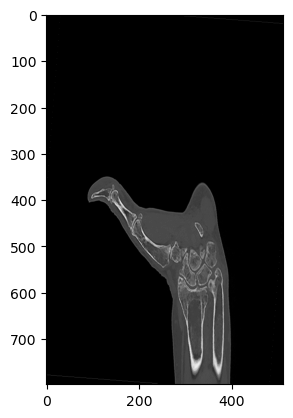

In [157]:
%matplotlib inline
image70 = Image.open('57(2).png')
plt.imshow(image70, cmap='gray')
#plt.axis('off')
plt.show()

In [158]:
image = Image.open('57(2).png')

# размеры для обрезки
left = 250
top = 500
right = 75
bottom = 100

cropped_image = image.crop((left, top, image.width - right, image.height - bottom))

cropped_image.save('57(2)_cropped.png')

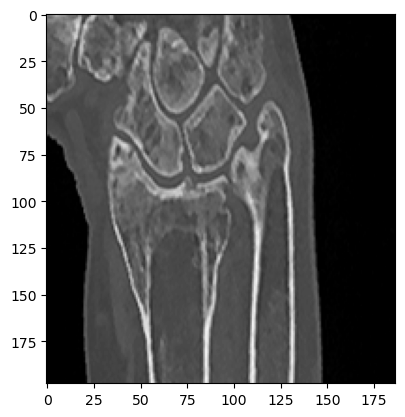

In [159]:
%matplotlib inline
image70 = Image.open('57(2)_cropped.png')
plt.imshow(image70, cmap='gray')
#plt.axis('off')
plt.show()

#### Преобразование одноканального изображения в четырёхканальное

In [160]:
# Путь к входному и выходному изображениям
input_image_path = '57(2)_cropped.png'
output_image_path = '57(2_4).png'

# Открытие одноканального изображения
single_channel_image = Image.open(input_image_path).convert("L")  # Переход в режим "L" (одноканальное изображение)
single_channel_data = np.array(single_channel_image)

# Создание пустого массива для четырехканального изображения
height, width = single_channel_data.shape
four_channel_data = np.zeros((height, width, 4), dtype=np.uint8)

# Заполнение RGB каналов одноканальным изображением и альфа-канала значением 255 (полная непрозрачность)
four_channel_data[..., 0] = single_channel_data  # Красный канал
four_channel_data[..., 1] = single_channel_data  # Зеленый канал
four_channel_data[..., 2] = single_channel_data  # Синий канал
four_channel_data[..., 3] = 255  # Альфа-канал

# Создание четырехканального изображения из массива данных
four_channel_image = Image.fromarray(four_channel_data, 'RGBA')

# Сохранение четырехканального изображения
four_channel_image.save(output_image_path)

print(f"Четырехканальное изображение сохранено как {output_image_path}")

Четырехканальное изображение сохранено как 57(2_4).png


#### Лучевая

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
from PIL import Image, ImageDraw
import pandas as pd
import matplotlib

matplotlib.use('TkAgg')  # Используйте TkAgg backend
from matplotlib.backend_bases import MouseButton

df57 = pd.DataFrame(columns=['pixels_inside_curve'])

image_path = '57(2_4).png'  # Путь к изображению
image = Image.open(image_path).convert("RGBA")

# Конвертируем изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# Создаем список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro', markersize=1)
        fig.canvas.draw()
        
        # Когда было выбрано 31 точек или больше, нарисовать кривую линию
        if len(points) == 31:
            if points[0] != points[-1]:
                points.append(points[0])
            line_image = draw_spline(points)  # Теперь передаем line_image
            save_combined_image(line_image)
            save_internal_pixels_list(points)  # Сначала сохраним изображение, затем пиксели
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=0.3)  # Рисование линии
    fig.canvas.draw()
    
     # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    return line_image

# Функция для сохранения изображения с нанесённой линией
def save_combined_image(line_image):
    # Копируем исходное изображение
    combined_image = image.copy()
    combined_image = Image.alpha_composite(combined_image, line_image)
    combined_image.save("57(2-4)_and_line.png")
    print("Изображение сохранено как 57(2-4)_and_line.png")

# Функция для сохранения списка пикселей внутри замкнутой кривой линии
def save_internal_pixels_list(points):
    mask = Image.new("L", image.size, 0)
    points = [(int(p[0]), int(p[1])) for p in points]
    ImageDraw.Draw(mask).polygon(points, outline=1, fill=1)
    mask = np.array(mask)
    
    internal_pixels = image_array[mask == 1]
    
    # Добавление списка пикселей в DataFrame
    df57.loc[len(df57)] = [internal_pixels.tolist()]
    print("Пиксели внутри замкнутой кривой линии добавлены в DataFrame")
    print(df57)

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение сохранено как 57(2-4)_and_line.png
Пиксели внутри замкнутой кривой линии добавлены в DataFrame
                                 pixels_inside_curve
0  [[156, 156, 156, 255], [129, 129, 129, 255], [...


In [50]:
df57

,pixels_inside_curve
0,"[[156, 156, 156, 255], [129, 129, 129, 255], [..."


In [51]:
len(df57.iloc[0,0])

3069

In [52]:
c57 = df57.iloc[0,0]

In [53]:
c57[0]

[156, 156, 156, 255]

In [54]:
listic57 = [sublist[0] for sublist in c57]  # Список первых элементов
print(listic57[0:5]) 

[156, 129, 128, 119, 137]


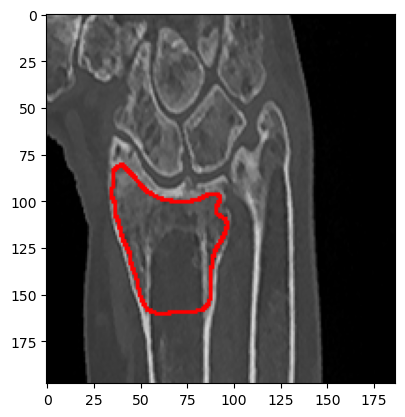

In [55]:
%matplotlib inline
image57 = Image.open('57(2-4)_and_line.png')
plt.imshow(image57, cmap='gray')
#plt.axis('off')
plt.show()

#### Сохранение списка в директорию

In [56]:
# Сохранение в формате pickle
import pickle
with open('listic57.pkl', 'wb') as f:
    pickle.dump(listic57, f)

In [57]:
# Загрузка из pickle-файла
with open('listic57.pkl', 'rb') as f:
    listic57 = pickle.load(f)

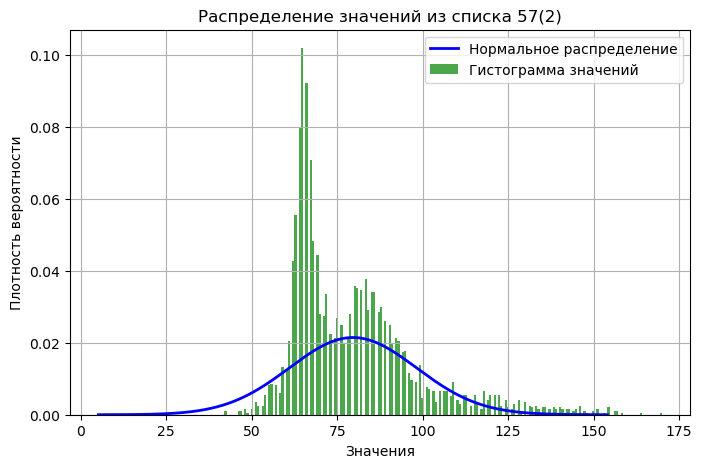

Эксцесс  2.3099831884295625
Асимметрия  1.4191025003995552
Минимальное значение пикселей: 42
Минимальное значение пикселей: 170
Среднее значение пикселей: 79.57478005865103
Три наиболее часто встречающихся значения:
Значение: 65, Частота: 200
Значение: 66, Частота: 181
Значение: 64, Частота: 157


In [215]:
%matplotlib inline
# Вычисление среднего и стандартного отклонения
mean = np.mean(listic57)
std_dev = np.std(listic57)

# Генерация точек для построения нормального распределения
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 500)
y = stats.norm.pdf(x, mean, std_dev)


# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(x, y, linewidth=2, color='blue', label='Нормальное распределение')
plt.hist(listic57, density=True, bins=200, alpha=0.7, color='g', label='Гистограмма значений')
plt.title('Распределение значений из списка 57(2)')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()
print("Эксцесс ", kurtosis(listic57))
print("Асимметрия ", skew(listic57))

mi = min(listic57)##################################################################
print(f'Минимальное значение пикселей: {mi}') 
ma = max(listic57)###################################################################
print(f'Минимальное значение пикселей: {ma}') 


average = statistics.mean(listic57)
print(f'Среднее значение пикселей: {average}') 

count = Counter(listic57)
# Получение трех наиболее распространенных значений и их частоты
most_common_three = count.most_common(3)
print("Три наиболее часто встречающихся значения:")
for value, freq in most_common_three:
    print(f'Значение: {value}, Частота: {freq}')


Отношение объема пересечения к объему объединения: 0.6357021801623602


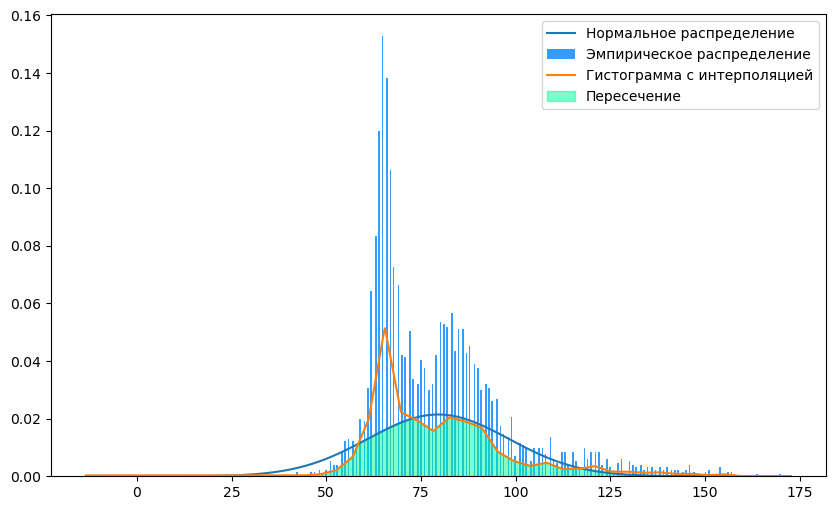

In [216]:
%matplotlib inline
# Вычисление среднего и стандартного отклонения
mean = np.mean(listic57)
std_dev = np.std(listic57)

# Генерация точек для нормального распределения
x = np.linspace(mean - 5*std_dev, mean + 5*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)

# Построение гистограммы для списка listic
hist, bin_edges = np.histogram(listic57, bins=30, density=True)

# Пересчет гистограммы в значения плотности
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Интерполяция значений для гистограммы для лучшего сравнения
hist_interp = np.interp(x, bin_centers, hist)

# Рассчитываем минимальные значения для пересечения распределений
intersection = np.minimum(y, hist_interp)

# Объемы
volume_intersection = np.trapz(intersection, x)
volume_union = np.trapz(y, x) + np.trapz(hist_interp, x) - volume_intersection

# Отношение объема пересечения к объему объединения
ratio = volume_intersection / volume_union

print(f'Отношение объема пересечения к объему объединения: {ratio}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Нормальное распределение')
plt.hist(listic57, bins=300, color='DodgerBlue', density=True, alpha=0.9, label='Эмпирическое распределение')
plt.plot(x, hist_interp, label='Гистограмма с интерполяцией')
plt.fill_between(x, intersection, color='MediumSpringGreen', alpha=0.5, label='Пересечение')
plt.legend()
plt.show()

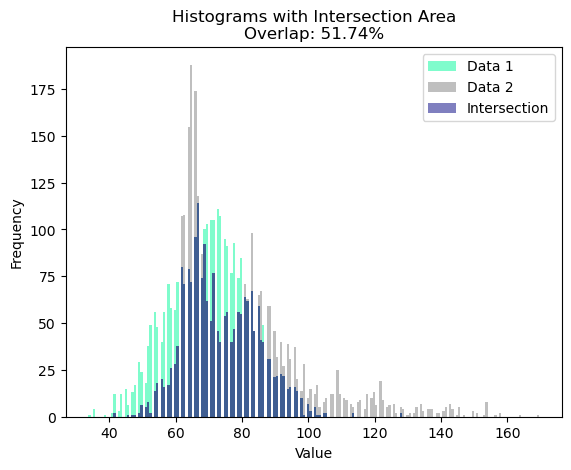

In [163]:
import numpy as np
import matplotlib.pyplot as plt

def resample_list(data, target_size, seed):
    """Функция для ресемплирования одного списка до размера другого."""
    np.random.seed(seed)  # Установим seed для воспроизводимости
    return np.random.choice(data, target_size, replace=True)

def compute_histogram(data, bins, range):
    """Функция для построения гистограммы."""
    hist, bin_edges = np.histogram(data, bins=bins, range=range)
    return hist, bin_edges

def calculate_overlap_and_union(norm_hist, pat_hist):
    """Функция для вычисления объема пересечения и объема объединения."""
    overlap = np.minimum(norm_hist, pat_hist).sum()
    union = np.maximum(norm_hist, pat_hist).sum()
    return overlap, union

data1 = listic228
data2 = listic57

# Установим значение seed для воспроизводимости
seed = 42

# Ресемплирование списков до одинакового размера
target_size = max(len(data1), len(data2))
data1_resampled = resample_list(data1, target_size, seed)
data2_resampled = resample_list(data2, target_size, seed)

# Определение количества контейнеров (bins) для гистограммы
num_bins = 200

# Определение диапазона данных для гистограммы
data_range = (min(min(data1_resampled), min(data2_resampled)), max(max(data1_resampled), max(data2_resampled)))

# Построение гистограмм
hist1, bin_edges1 = compute_histogram(data1_resampled, bins=num_bins, range=data_range)
hist2, bin_edges2 = compute_histogram(data2_resampled, bins=num_bins, range=data_range)

# Находим минимальные значения гистограмм для зоны пересечения
intersection = np.minimum(hist1, hist2)

# Определяем ширину контейнера (бина)
bin_width = (bin_edges1[1] - bin_edges1[0])

# Вычисление пересечения и объединения гистограмм
overlap, union = calculate_overlap_and_union(hist1, hist2)

# Вычисление показателя степени пересечения в процентах
overlap_percentage = (overlap / union) * 100

# Построение графика
fig, ax = plt.subplots()

# Гистограмма для данных 1
ax.bar(bin_edges1[:-1], hist1, width=bin_width, color='MediumSpringGreen', alpha=0.5, label='Data 1')

# Гистограмма для данных 2
ax.bar(bin_edges2[:-1], hist2, width=bin_width, color='Gray', alpha=0.5, label='Data 2')

# Пересечение гистограмм
ax.bar(bin_edges1[:-1], intersection, width=bin_width, color='Navy', alpha=0.5, label='Intersection')

# Легенда и подписи
ax.legend()
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title(f'Histograms with Intersection Area\nOverlap: {overlap_percentage:.2f}%')

plt.show()

<h1 style="color:Maroon;">Патология 44(2)</h1>

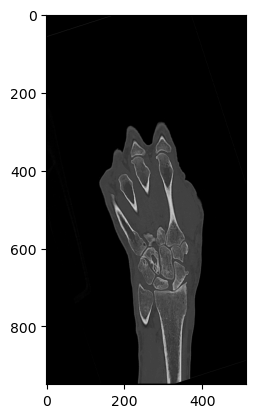

In [164]:
%matplotlib inline
image46 = Image.open('44(2).png')
plt.imshow(image46, cmap='gray')
#plt.axis('off')
plt.show()

In [165]:
image = Image.open('44(2).png')

# размеры для обрезки
left = 200
top = 550
right = 100
bottom = 50

cropped_image = image.crop((left, top, image.width - right, image.height - bottom))

cropped_image.save('44(2)_cropped.png')

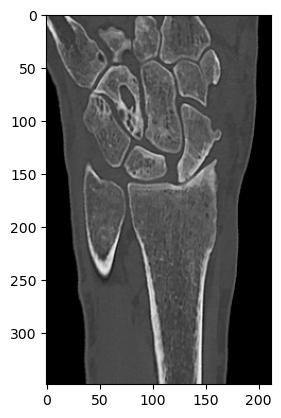

In [166]:
%matplotlib inline
image44 = Image.open('44(2)_cropped.png')
plt.imshow(image44, cmap='gray')
#plt.axis('off')
plt.show()

#### Преобразование одноканального изображения в четырёхканальное

In [92]:
# Путь к входному и выходному изображениям
input_image_path = '44(2)_cropped.png'
output_image_path = '44(2_4).png'

# Открытие одноканального изображения
single_channel_image = Image.open(input_image_path).convert("L")  # Переход в режим "L" (одноканальное изображение)
single_channel_data = np.array(single_channel_image)

# Создание пустого массива для четырехканального изображения
height, width = single_channel_data.shape
four_channel_data = np.zeros((height, width, 4), dtype=np.uint8)

# Заполнение RGB каналов одноканальным изображением и альфа-канала значением 255 (полная непрозрачность)
four_channel_data[..., 0] = single_channel_data  # Красный канал
four_channel_data[..., 1] = single_channel_data  # Зеленый канал
four_channel_data[..., 2] = single_channel_data  # Синий канал
four_channel_data[..., 3] = 255  # Альфа-канал

# Создание четырехканального изображения из массива данных
four_channel_image = Image.fromarray(four_channel_data, 'RGBA')

# Сохранение четырехканального изображения
four_channel_image.save(output_image_path)

print(f"Четырехканальное изображение сохранено как {output_image_path}")

Четырехканальное изображение сохранено как 44(2_4).png


#### Лучевая

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
from PIL import Image, ImageDraw
import pandas as pd
import matplotlib

matplotlib.use('TkAgg')  # Используйте TkAgg backend
from matplotlib.backend_bases import MouseButton

df44 = pd.DataFrame(columns=['pixels_inside_curve'])

image_path = '44(2_4).png'  # Путь к изображению
image = Image.open(image_path).convert("RGBA")

# Конвертируем изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# Создаем список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro', markersize=3)
        fig.canvas.draw()
        
        # Когда было выбрано 31 точек или больше, нарисовать кривую линию
        if len(points) == 31:
            if points[0] != points[-1]:
                points.append(points[0])
            line_image = draw_spline(points)  # Теперь передаем line_image
            save_combined_image(line_image)
            save_internal_pixels_list(points)  # Сначала сохраним изображение, затем пиксели
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=1.5)  # Рисование линии
    fig.canvas.draw()
    
     # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    return line_image

# Функция для сохранения изображения с нанесённой линией
def save_combined_image(line_image):
    # Копируем исходное изображение
    combined_image = image.copy()
    combined_image = Image.alpha_composite(combined_image, line_image)
    combined_image.save("44(2-4)_and_line.png")
    print("Изображение сохранено как 44(2-4)_and_line.png")

# Функция для сохранения списка пикселей внутри замкнутой кривой линии
def save_internal_pixels_list(points):
    mask = Image.new("L", image.size, 0)
    points = [(int(p[0]), int(p[1])) for p in points]
    ImageDraw.Draw(mask).polygon(points, outline=1, fill=1)
    mask = np.array(mask)
    
    internal_pixels = image_array[mask == 1]
    
    # Добавление списка пикселей в DataFrame
    df44.loc[len(df44)] = [internal_pixels.tolist()]
    print("Пиксели внутри замкнутой кривой линии добавлены в DataFrame")
    print(df44)

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение сохранено как 44(2-4)_and_line.png
Пиксели внутри замкнутой кривой линии добавлены в DataFrame
                                 pixels_inside_curve
0  [[119, 119, 119, 255], [125, 125, 125, 255], [...


In [94]:
df44

,pixels_inside_curve
0,"[[119, 119, 119, 255], [125, 125, 125, 255], [..."


In [95]:
len(df44.iloc[0,0])

6115

In [96]:
c44 = df44.iloc[0,0]

In [97]:
c44[0]

[119, 119, 119, 255]

In [98]:
listic44 = [sublist[0] for sublist in c54]  # Список первых элементов
print(listic54[0:5]) 

[114, 124, 113, 90, 105]


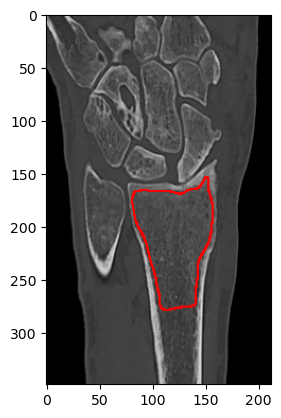

In [99]:
%matplotlib inline
image54 = Image.open('44(2-4)_and_line.png')
plt.imshow(image54, cmap='gray')
#plt.axis('off')
plt.show()

#### Сохранение списка в директорию

In [100]:
# Сохранение в формате pickle
import pickle
with open('listic44.pkl', 'wb') as f:
    pickle.dump(listic44, f)

In [101]:
# Загрузка из pickle-файла
with open('listic44.pkl', 'rb') as f:
    listic44 = pickle.load(f)

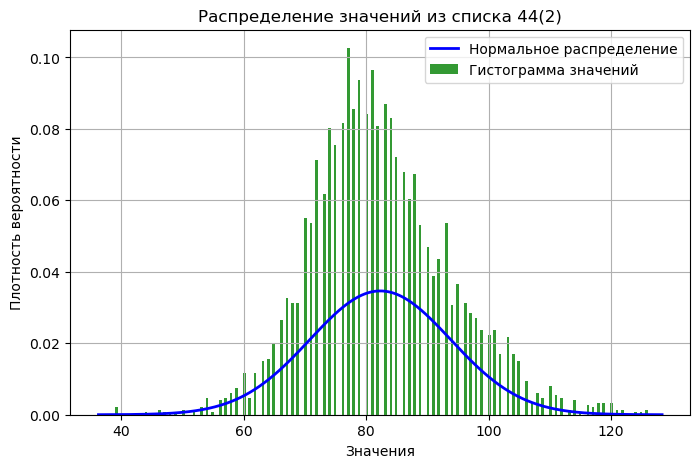

Эксцесс  0.6691090459315485
Асимметрия  0.3933386116883933
Минимальное значение пикселей: 39
Минимальное значение пикселей: 126
Среднее значение пикселей: 82.2962743938498
Три наиболее часто встречающихся значения:
Значение: 77, Частота: 151
Значение: 81, Частота: 142
Значение: 79, Частота: 138


In [217]:
%matplotlib inline
# Вычисление среднего и стандартного отклонения
mean = np.mean(listic44)
std_dev = np.std(listic44)

# Генерация точек для построения нормального распределения
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 500)
y = stats.norm.pdf(x, mean, std_dev)


# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(x, y, linewidth=2, color='blue', label='Нормальное распределение')
plt.hist(listic44, density=True, bins=200, alpha=0.8, color='g', label='Гистограмма значений')
#sns.distplot(listic44, bins=200, color='Teal', label='Гистограмма значений')
plt.title('Распределение значений из списка 44(2)')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()
print("Эксцесс ", kurtosis(listic44))
print("Асимметрия ", skew(listic44))

mi = min(listic44)##################################################################
print(f'Минимальное значение пикселей: {mi}') 
ma = max(listic44)###################################################################
print(f'Минимальное значение пикселей: {ma}') 


average = statistics.mean(listic44)
print(f'Среднее значение пикселей: {average}') 

count = Counter(listic44)
# Получение трех наиболее распространенных значений и их частоты
most_common_three = count.most_common(3)
print("Три наиболее часто встречающихся значения:")
for value, freq in most_common_three:
    print(f'Значение: {value}, Частота: {freq}')


Отношение объема пересечения к объему объединения: 0.8184258959900492


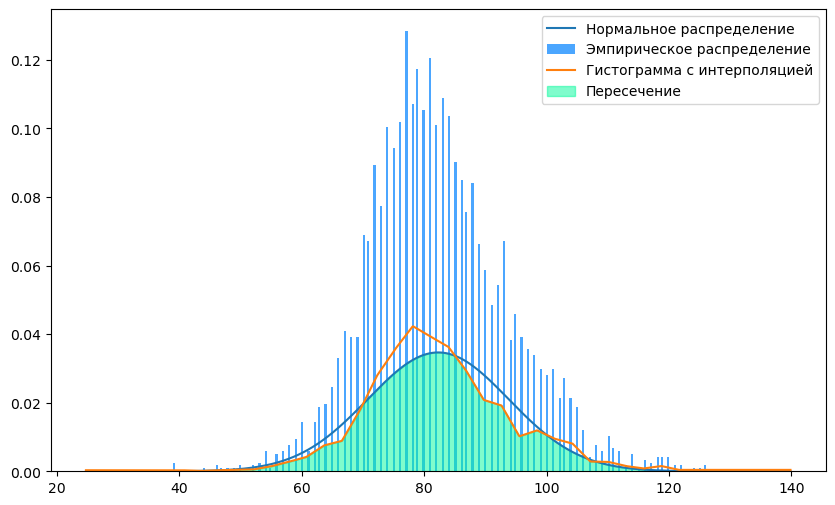

In [219]:
%matplotlib inline
# Вычисление среднего и стандартного отклонения
mean = np.mean(listic44)
std_dev = np.std(listic44)

# Генерация точек для нормального распределения
x = np.linspace(mean - 5*std_dev, mean + 5*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)

# Построение гистограммы для списка listic
hist, bin_edges = np.histogram(listic44, bins=30, density=True)

# Пересчет гистограммы в значения плотности
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Интерполяция значений для гистограммы для лучшего сравнения
hist_interp = np.interp(x, bin_centers, hist)

# Рассчитываем минимальные значения для пересечения распределений
intersection = np.minimum(y, hist_interp)

# Объемы
volume_intersection = np.trapz(intersection, x)
volume_union = np.trapz(y, x) + np.trapz(hist_interp, x) - volume_intersection

# Отношение объема пересечения к объему объединения
ratio = volume_intersection / volume_union

print(f'Отношение объема пересечения к объему объединения: {ratio}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Нормальное распределение')
plt.hist(listic44, bins=250, color='DodgerBlue', density=True, alpha=0.8, label='Эмпирическое распределение')
plt.plot(x, hist_interp, label='Гистограмма с интерполяцией')
plt.fill_between(x, intersection, color='MediumSpringGreen', alpha=0.5, label='Пересечение')
plt.legend()
plt.show()

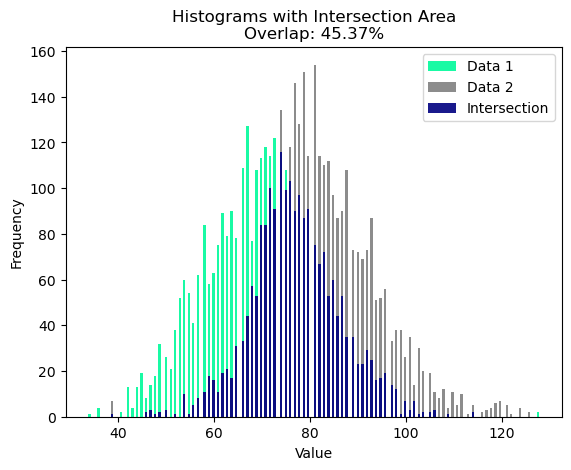

In [220]:
import numpy as np
import matplotlib.pyplot as plt

def resample_list(data, target_size, seed):
    """Функция для ресемплирования одного списка до размера другого."""
    np.random.seed(seed)  # Установим seed для воспроизводимости
    return np.random.choice(data, target_size, replace=True)

def compute_histogram(data, bins, range):
    """Функция для построения гистограммы."""
    hist, bin_edges = np.histogram(data, bins=bins, range=range)
    return hist, bin_edges

def calculate_overlap_and_union(norm_hist, pat_hist):
    """Функция для вычисления объема пересечения и объема объединения."""
    overlap = np.minimum(norm_hist, pat_hist).sum()
    union = np.maximum(norm_hist, pat_hist).sum()
    return overlap, union

data1 = listic228
data2 = listic44

# Установим значение seed для воспроизводимости
seed = 42

# Ресемплирование списков до одинакового размера
target_size = max(len(data1), len(data2))
data1_resampled = resample_list(data1, target_size, seed)
data2_resampled = resample_list(data2, target_size, seed)

# Определение количества контейнеров (bins) для гистограммы
num_bins = 200

# Определение диапазона данных для гистограммы
data_range = (min(min(data1_resampled), min(data2_resampled)), max(max(data1_resampled), max(data2_resampled)))

# Построение гистограмм
hist1, bin_edges1 = compute_histogram(data1_resampled, bins=num_bins, range=data_range)
hist2, bin_edges2 = compute_histogram(data2_resampled, bins=num_bins, range=data_range)

# Находим минимальные значения гистограмм для зоны пересечения
intersection = np.minimum(hist1, hist2)

# Определяем ширину контейнера (бина)
bin_width = (bin_edges1[1] - bin_edges1[0])

# Вычисление пересечения и объединения гистограмм
overlap, union = calculate_overlap_and_union(hist1, hist2)

# Вычисление показателя степени пересечения в процентах
overlap_percentage = (overlap / union) * 100

# Построение графика
fig, ax = plt.subplots()

# Гистограмма для данных 1
ax.bar(bin_edges1[:-1], hist1, width=bin_width, color='MediumSpringGreen', alpha=0.9, label='Data 1')

# Гистограмма для данных 2
ax.bar(bin_edges2[:-1], hist2, width=bin_width, color='Gray', alpha=0.9, label='Data 2')

# Пересечение гистограмм
ax.bar(bin_edges1[:-1], intersection, width=bin_width, color='Navy', alpha=0.9, label='Intersection')

# Легенда и подписи
ax.legend()
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title(f'Histograms with Intersection Area\nOverlap: {overlap_percentage:.2f}%')

plt.show()

<h1 style="color:Maroon;">Патология 40(2)</h1>

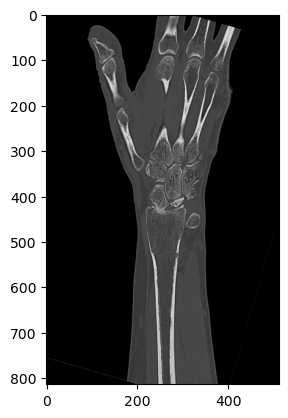

In [174]:
%matplotlib inline
image46 = Image.open('20(2).png')
plt.imshow(image46, cmap='gray')
#plt.axis('off')
plt.show()

In [175]:
image = Image.open('20(2).png')

# размеры для обрезки
left = 175
top = 300
right = 100
bottom = 200

cropped_image = image.crop((left, top, image.width - right, image.height - bottom))

cropped_image.save('20(2)_cropped.png')

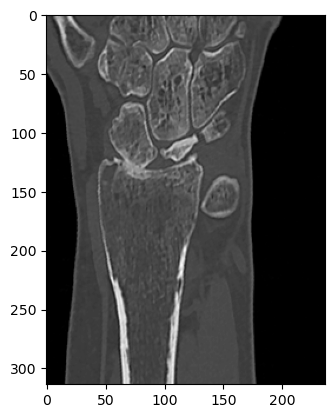

In [176]:
%matplotlib inline
image44 = Image.open('20(2)_cropped.png')
plt.imshow(image44, cmap='gray')
#plt.axis('off')
plt.show()

In [177]:
# Путь к входному и выходному изображениям
input_image_path = '20(2)_cropped.png'
output_image_path = '20(2_4).png'

# Открытие одноканального изображения
single_channel_image = Image.open(input_image_path).convert("L")  # Переход в режим "L" (одноканальное изображение)
single_channel_data = np.array(single_channel_image)

# Создание пустого массива для четырехканального изображения
height, width = single_channel_data.shape
four_channel_data = np.zeros((height, width, 4), dtype=np.uint8)

# Заполнение RGB каналов одноканальным изображением и альфа-канала значением 255 (полная непрозрачность)
four_channel_data[..., 0] = single_channel_data  # Красный канал
four_channel_data[..., 1] = single_channel_data  # Зеленый канал
four_channel_data[..., 2] = single_channel_data  # Синий канал
four_channel_data[..., 3] = 255  # Альфа-канал

# Создание четырехканального изображения из массива данных
four_channel_image = Image.fromarray(four_channel_data, 'RGBA')

# Сохранение четырехканального изображения
four_channel_image.save(output_image_path)

print(f"Четырехканальное изображение сохранено как {output_image_path}")

Четырехканальное изображение сохранено как 20(2_4).png


#### Лучевая

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
from PIL import Image, ImageDraw
import pandas as pd
import matplotlib

matplotlib.use('TkAgg')  # Используйте TkAgg backend
from matplotlib.backend_bases import MouseButton

df20 = pd.DataFrame(columns=['pixels_inside_curve'])

image_path = '20(2_4).png'  # Путь к изображению
image = Image.open(image_path).convert("RGBA")

# Конвертируем изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# Создаем список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro', markersize=3)
        fig.canvas.draw()
        
        # Когда было выбрано 31 точек или больше, нарисовать кривую линию
        if len(points) == 31:
            if points[0] != points[-1]:
                points.append(points[0])
            line_image = draw_spline(points)  # Теперь передаем line_image
            save_combined_image(line_image)
            save_internal_pixels_list(points)  # Сначала сохраним изображение, затем пиксели
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=1.5)  # Рисование линии
    fig.canvas.draw()
    
     # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    return line_image

# Функция для сохранения изображения с нанесённой линией
def save_combined_image(line_image):
    # Копируем исходное изображение
    combined_image = image.copy()
    combined_image = Image.alpha_composite(combined_image, line_image)
    combined_image.save("20(2-4)_and_line.png")
    print("Изображение сохранено как 20(2-4)_and_line.png")

# Функция для сохранения списка пикселей внутри замкнутой кривой линии
def save_internal_pixels_list(points):
    mask = Image.new("L", image.size, 0)
    points = [(int(p[0]), int(p[1])) for p in points]
    ImageDraw.Draw(mask).polygon(points, outline=1, fill=1)
    mask = np.array(mask)
    
    internal_pixels = image_array[mask == 1]
    
    # Добавление списка пикселей в DataFrame
    df20.loc[len(df20)] = [internal_pixels.tolist()]
    print("Пиксели внутри замкнутой кривой линии добавлены в DataFrame")
    print(df20)

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение сохранено как 20(2-4)_and_line.png
Пиксели внутри замкнутой кривой линии добавлены в DataFrame
                                 pixels_inside_curve
0  [[67, 67, 67, 255], [71, 71, 71, 255], [71, 71...


In [180]:
df20

,pixels_inside_curve
0,"[[67, 67, 67, 255], [71, 71, 71, 255], [71, 71..."


In [181]:
len(df20.iloc[0,0])

6576

In [182]:
c20 = df20.iloc[0,0]

In [183]:
c20[0]

[67, 67, 67, 255]

In [184]:
listic20 = [sublist[0] for sublist in c20]  # Список первых элементов
print(listic20[0:5]) 

[67, 71, 71, 67, 68]


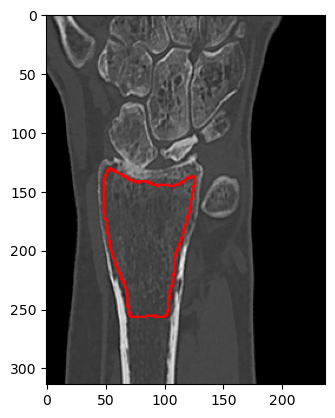

In [185]:
%matplotlib inline
image54 = Image.open('20(2-4)_and_line.png')
plt.imshow(image54, cmap='gray')
#plt.axis('off')
plt.show()

#### Сохранение списка в директорию

In [186]:
# Сохранение в формате pickle
import pickle
with open('listic20.pkl', 'wb') as f:
    pickle.dump(listic20, f)

In [187]:
# Загрузка из pickle-файла
with open('listic20.pkl', 'rb') as f:
    listic20 = pickle.load(f)

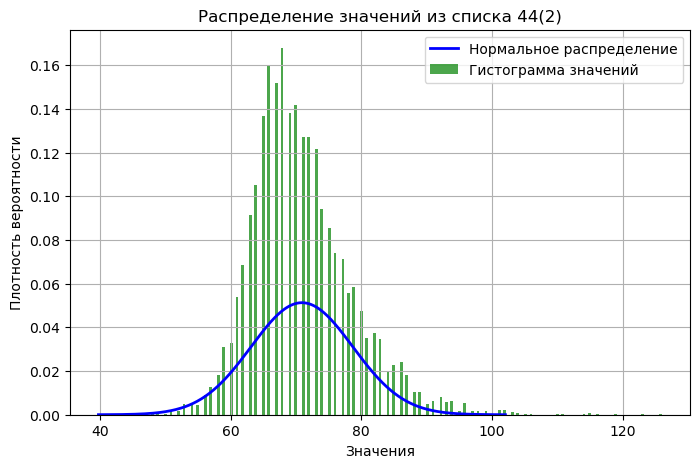

Эксцесс  2.5395951931798235
Асимметрия  0.9997986168368701
Минимальное значение пикселей: 45
Минимальное значение пикселей: 126
Среднее значение пикселей: 70.92153284671532
Три наиболее часто встречающихся значения:
Значение: 68, Частота: 447
Значение: 66, Частота: 425
Значение: 67, Частота: 404


In [221]:
%matplotlib inline
# Вычисление среднего и стандартного отклонения
mean = np.mean(listic20)
std_dev = np.std(listic20)

# Генерация точек для построения нормального распределения
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 500)
y = stats.norm.pdf(x, mean, std_dev)


# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(x, y, linewidth=2, color='blue', label='Нормальное распределение')
plt.hist(listic20, density=True, bins=200, alpha=0.7, color='g', label='Гистограмма значений')
#sns.distplot(listic44, bins=200, color='Teal', label='Гистограмма значений')
plt.title('Распределение значений из списка 44(2)')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()
print("Эксцесс ", kurtosis(listic20))
print("Асимметрия ", skew(listic20))

mi = min(listic20)##################################################################
print(f'Минимальное значение пикселей: {mi}') 
ma = max(listic20)###################################################################
print(f'Минимальное значение пикселей: {ma}') 


average = statistics.mean(listic20)
print(f'Среднее значение пикселей: {average}') 

count = Counter(listic20)
# Получение трех наиболее распространенных значений и их частоты
most_common_three = count.most_common(3)
print("Три наиболее часто встречающихся значения:")
for value, freq in most_common_three:
    print(f'Значение: {value}, Частота: {freq}')


Отношение объема пересечения к объему объединения: 0.7913398420370383


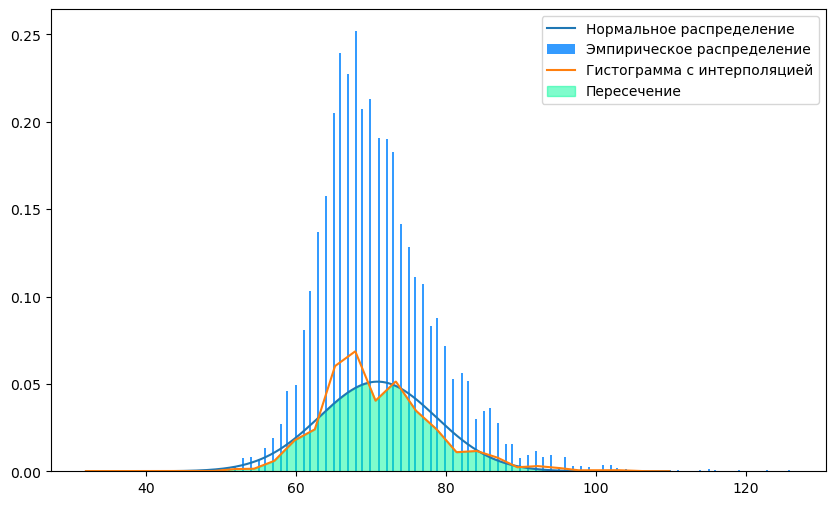

In [225]:
%matplotlib inline
# Вычисление среднего и стандартного отклонения
mean = np.mean(listic20)
std_dev = np.std(listic20)

# Генерация точек для нормального распределения
x = np.linspace(mean - 5*std_dev, mean + 5*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)

# Построение гистограммы для списка listic
hist, bin_edges = np.histogram(listic20, bins=30, density=True)

# Пересчет гистограммы в значения плотности
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Интерполяция значений для гистограммы для лучшего сравнения
hist_interp = np.interp(x, bin_centers, hist)

# Рассчитываем минимальные значения для пересечения распределений
intersection = np.minimum(y, hist_interp)

# Объемы
volume_intersection = np.trapz(intersection, x)
volume_union = np.trapz(y, x) + np.trapz(hist_interp, x) - volume_intersection

# Отношение объема пересечения к объему объединения
ratio = volume_intersection / volume_union

print(f'Отношение объема пересечения к объему объединения: {ratio}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Нормальное распределение')
plt.hist(listic20, bins=300, color='DodgerBlue', density=True, alpha=0.9, label='Эмпирическое распределение')
plt.plot(x, hist_interp, label='Гистограмма с интерполяцией')
plt.fill_between(x, intersection, color='MediumSpringGreen', alpha=0.5, label='Пересечение')
plt.legend()
plt.show()

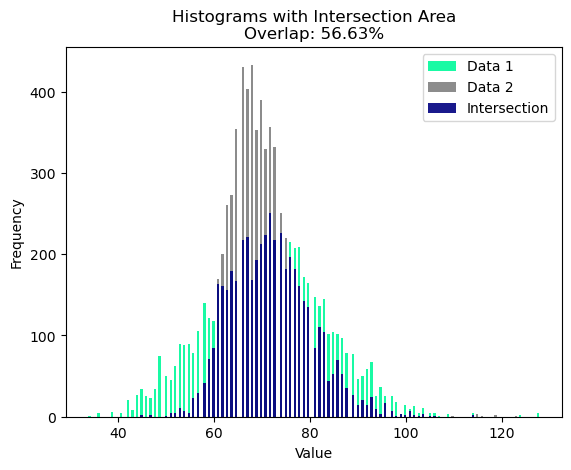

In [201]:
import numpy as np
import matplotlib.pyplot as plt

def resample_list(data, target_size, seed):
    """Функция для ресемплирования одного списка до размера другого."""
    np.random.seed(seed)  # Установим seed для воспроизводимости
    return np.random.choice(data, target_size, replace=True)

def compute_histogram(data, bins, range):
    """Функция для построения гистограммы."""
    hist, bin_edges = np.histogram(data, bins=bins, range=range)
    return hist, bin_edges

def calculate_overlap_and_union(norm_hist, pat_hist):
    """Функция для вычисления объема пересечения и объема объединения."""
    overlap = np.minimum(norm_hist, pat_hist).sum()
    union = np.maximum(norm_hist, pat_hist).sum()
    return overlap, union

data1 = listic228
data2 = listic20

# Установим значение seed для воспроизводимости
seed = 42

# Ресемплирование списков до одинакового размера
target_size = max(len(data1), len(data2))
data1_resampled = resample_list(data1, target_size, seed)
data2_resampled = resample_list(data2, target_size, seed)

# Определение количества контейнеров (bins) для гистограммы
num_bins = 200

# Определение диапазона данных для гистограммы
data_range = (min(min(data1_resampled), min(data2_resampled)), max(max(data1_resampled), max(data2_resampled)))

# Построение гистограмм
hist1, bin_edges1 = compute_histogram(data1_resampled, bins=num_bins, range=data_range)
hist2, bin_edges2 = compute_histogram(data2_resampled, bins=num_bins, range=data_range)

# Находим минимальные значения гистограмм для зоны пересечения
intersection = np.minimum(hist1, hist2)

# Определяем ширину контейнера (бина)
bin_width = (bin_edges1[1] - bin_edges1[0])

# Вычисление пересечения и объединения гистограмм
overlap, union = calculate_overlap_and_union(hist1, hist2)

# Вычисление показателя степени пересечения в процентах
overlap_percentage = (overlap / union) * 100

# Построение графика
fig, ax = plt.subplots()

# Гистограмма для данных 1
ax.bar(bin_edges1[:-1], hist1, width=bin_width, color='MediumSpringGreen', alpha=0.9, label='Data 1')

# Гистограмма для данных 2
ax.bar(bin_edges2[:-1], hist2, width=bin_width, color='Gray', alpha=0.9, label='Data 2')

# Пересечение гистограмм
ax.bar(bin_edges1[:-1], intersection, width=bin_width, color='Navy', alpha=0.9, label='Intersection')

# Легенда и подписи
ax.legend()
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title(f'Histograms with Intersection Area\nOverlap: {overlap_percentage:.2f}%')

plt.show()